# Predicting Heart Attack Risk 

### Import Neccessary Packages 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np


from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import time
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_curve, auc

from scipy.stats import uniform, randint
from sklearn.model_selection import KFold

In [2]:
#Creating a Pandas DF 
df = pd.read_csv('heart_attack_prediction_dataset.csv')
pd.set_option('display.max_columns', None)


In [3]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


### Descriptive Statistics 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [5]:
#Creating a variable with the names of numeric columns to be able to get a more approriate descriptive analysis of the data.
#Blood pressure was left out becasue it is a fractional number. This will be split into two features later on.
numeric_cols = ['Age','Cholesterol','Heart Rate','Exercise Hours Per Week','Stress Level','Sedentary Hours Per Day','Income','BMI','Triglycerides','Physical Activity Days Per Week','Sleep Hours Per Day']
df[numeric_cols].describe()

,Age,Cholesterol,Heart Rate,Exercise Hours Per Week,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,10.014284,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508
std,21.249509,80.863276,20.550948,5.783745,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473
min,18.000000,120.000000,40.000000,0.002442,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000
25%,35.000000,192.000000,57.000000,4.981579,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000
50%,54.000000,259.000000,75.000000,10.069559,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000
75%,72.000000,330.000000,93.000000,15.050018,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000
max,90.000000,400.000000,110.000000,19.998709,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000


In [6]:
#Checking to see if each record corresponds to one unique patient
if len(df['Patient ID'].unique()) == len(df):
    print('Each record accounts for a unique patient')
    
else:
    print('Some unique patients have more than one record')


Each record accounts for a unique patient


# Data Cleaning and Preparation 

In [7]:
# I will round the sedentary hours, BMI and Exercise hours to make for easier categories
df['Sedentary Hours Per Day'] = df['Sedentary Hours Per Day'].apply(lambda x: round(x))
df['BMI'] = df['BMI'].apply(lambda x: round(x))
df['Exercise Hours Per Week'] = df['Exercise Hours Per Week'].apply(lambda x: round(x))

In [8]:
# Changing the diet column to values 0,1,2 in order of healthiness.
df['Diet'] = df['Diet'].map({'Healthy':2,'Average':1,'Unhealthy':0})

In [9]:
#Dropping patient ID column now that we know that each record is for 1 unique patient. 
#I also dont need this column for my analysis
df = df.drop('Patient ID',axis = 1)

In [10]:
# Making Systolic and Diastolic into two different features.
df['BP_Systolic'] = df['Blood Pressure'].apply(lambda x: x.split('/')[0])
df['BP_Diastolic'] = df['Blood Pressure'].apply(lambda x: x.split('/')[1])

#Dropping the original column
df = df.drop(['Blood Pressure'],axis=1)

In [11]:
df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,BP_Systolic,BP_Diastolic
0,67,Male,208,72,0,0,1,0,0,4,1,0,0,9,7,261404,31,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,Male,389,98,1,1,1,1,1,2,0,1,0,1,5,285768,27,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,Female,324,72,1,0,0,0,0,2,2,1,1,9,9,235282,28,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,Male,383,73,1,1,1,0,1,10,1,1,0,9,8,125640,36,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,Male,318,93,1,1,1,1,0,6,0,1,0,6,2,160555,22,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


In [12]:
# Creating dummy variables for Country, Continent, Sex and Hemisphere
dummy_variables = pd.get_dummies(df[['Country','Hemisphere','Continent','Sex']], drop_first=True)


#Adding dummy variables back to dataframe
df_dummies = pd.concat([df, dummy_variables], axis=1)

# Dropping the original columns
df_dummies = df_dummies.drop(columns=['Country','Hemisphere','Continent','Sex'], axis=1)

In [13]:
df_dummies.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,BP_Systolic,BP_Diastolic,Country_Australia,Country_Brazil,Country_Canada,Country_China,Country_Colombia,Country_France,Country_Germany,Country_India,Country_Italy,Country_Japan,Country_New Zealand,Country_Nigeria,Country_South Africa,Country_South Korea,Country_Spain,Country_Thailand,Country_United Kingdom,Country_United States,Country_Vietnam,Hemisphere_Southern Hemisphere,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Sex_Male
0,67,208,72,0,0,1,0,0,4,1,0,0,9,7,261404,31,286,0,6,0,158,88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,21,389,98,1,1,1,1,1,2,0,1,0,1,5,285768,27,235,1,7,0,165,93,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,21,324,72,1,0,0,0,0,2,2,1,1,9,9,235282,28,587,4,4,0,174,99,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,84,383,73,1,1,1,0,1,10,1,1,0,9,8,125640,36,378,3,4,0,163,100,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,66,318,93,1,1,1,1,0,6,0,1,0,6,2,160555,22,231,1,5,0,91,88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [14]:
df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,BP_Systolic,BP_Diastolic
0,67,Male,208,72,0,0,1,0,0,4,1,0,0,9,7,261404,31,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,Male,389,98,1,1,1,1,1,2,0,1,0,1,5,285768,27,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,Female,324,72,1,0,0,0,0,2,2,1,1,9,9,235282,28,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,Male,383,73,1,1,1,0,1,10,1,1,0,9,8,125640,36,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,Male,318,93,1,1,1,1,0,6,0,1,0,6,2,160555,22,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


# Exploratory Data Analysis 

### Checking feature balances 

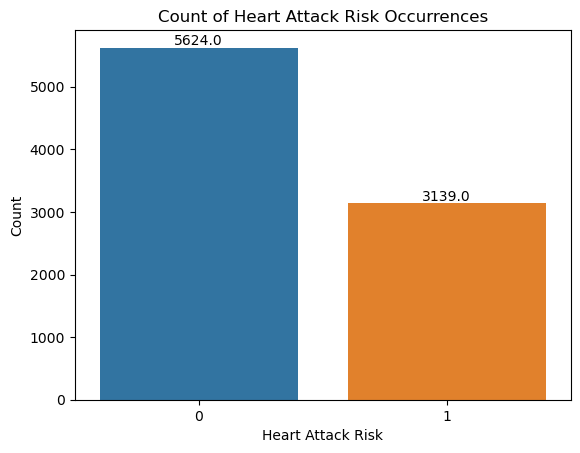

In [15]:
# Checking to see how balanced the target variable is.

ax = sns.countplot(x='Heart Attack Risk', data=df)

plt.xlabel('Heart Attack Risk')
plt.ylabel('Count')
plt.title('Count of Heart Attack Risk Occurrences')

# Displaying the values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

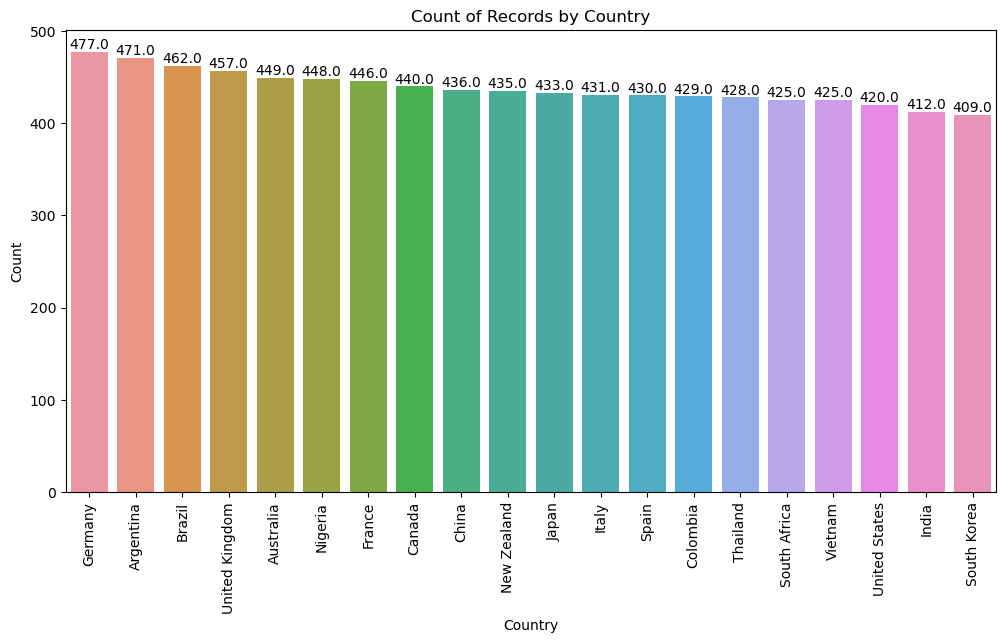

In [16]:
# Counting occurrences of each country
country_counts = df['Country'].value_counts()

# Making a wider figure so that all of the values are readable
plt.figure(figsize=(12, 6))


ax = sns.barplot(x=country_counts.index, y=country_counts.values)

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Records by Country')

plt.xticks(rotation=90)

# Displaying the values on the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


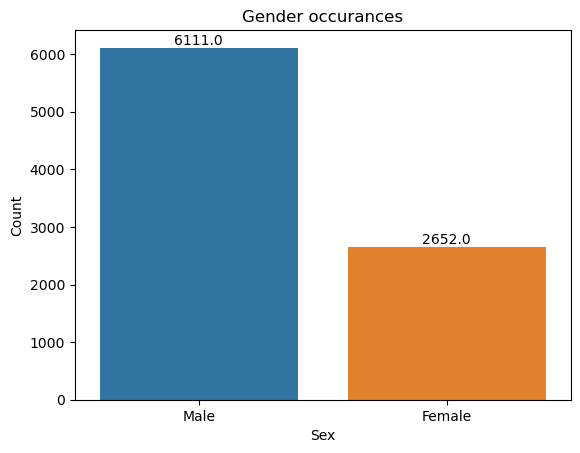

In [17]:
# Checking to see how balanced the 'Sex' variable is.

ax = sns.countplot(x='Sex', data=df)

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Gender occurances')

# Displaying the values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [18]:
# More males are represented than females in the data with 6111 males and 2652 females. 

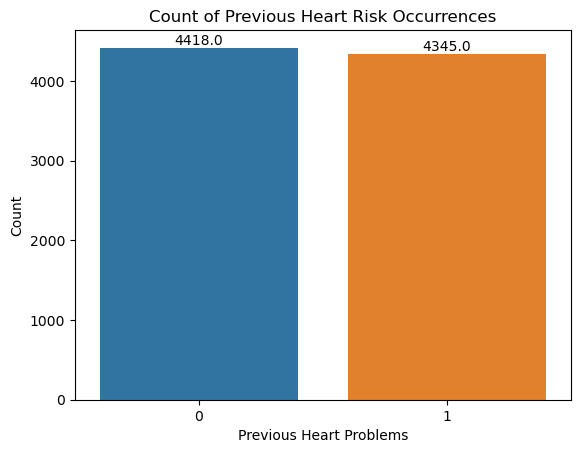

In [19]:
# Checking to see how balanced the 'Previous Heart Problems' variable is.

ax = sns.countplot(x='Previous Heart Problems', data=df)

plt.xlabel('Previous Heart Problems')
plt.ylabel('Count')
plt.title('Count of Previous Heart Risk Occurrences')

# Displaying the values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [20]:
# Features whos distributions I will plot using historgrams
features_distributions_cols = ['Age','Cholesterol','Income','BMI','Triglycerides','BP_Systolic','BP_Diastolic']

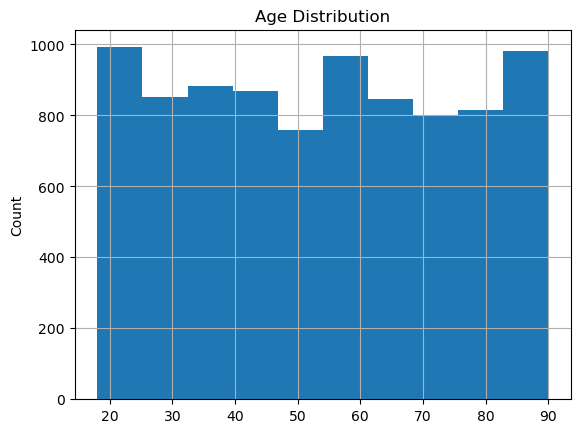

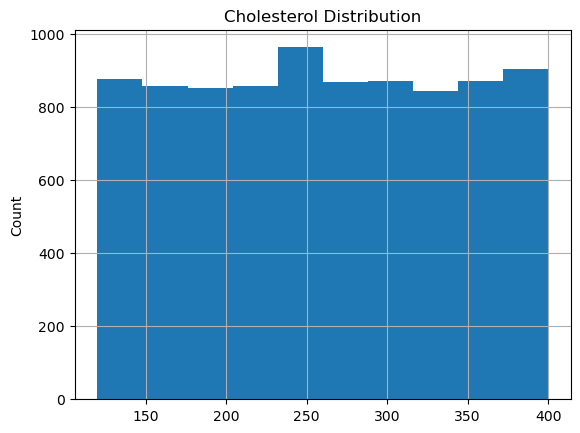

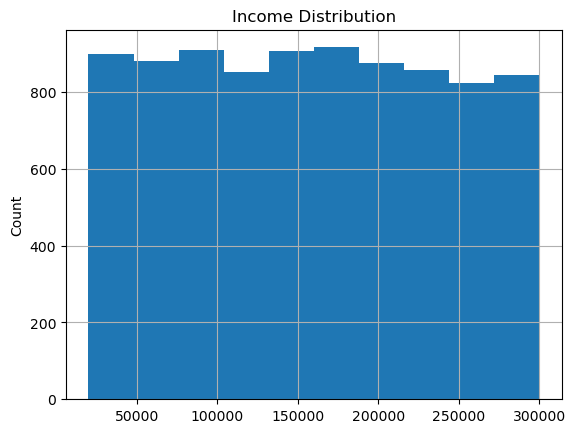

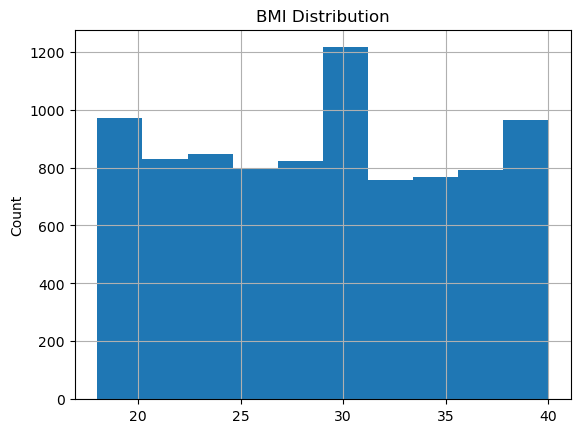

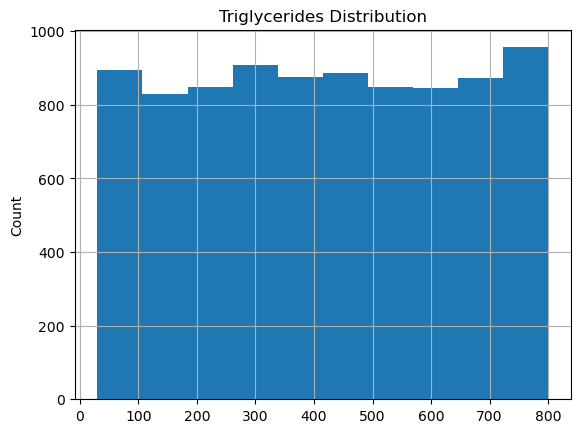

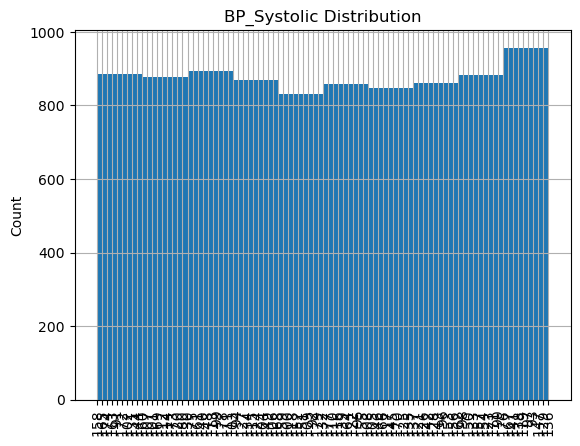

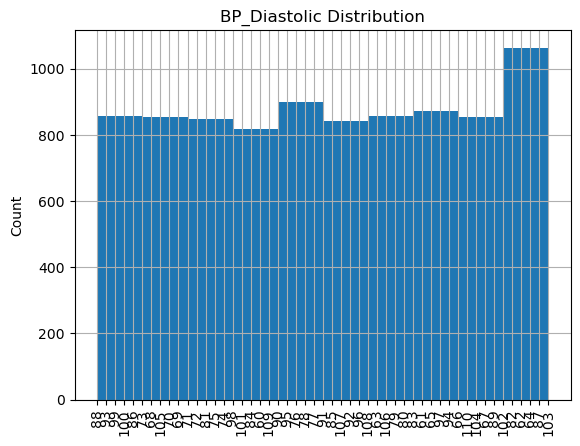

In [21]:
#Checking distributions of numeric features
for feature in features_distributions_cols:
    df[feature].hist()
    plt.title(f"{feature} Distribution")
    plt.ylabel('Count')
    if feature == 'BP_Diastolic' or feature == 'BP_Systolic':
        plt.xticks(rotation=90)
    plt.show()

In [22]:
cat_features = ['Diabetes','Family History','Smoking','Obesity','Alcohol Consumption','Exercise Hours Per Week','Diet','Medication Use','Stress Level','Sedentary Hours Per Day','Physical Activity Days Per Week','Sleep Hours Per Day']

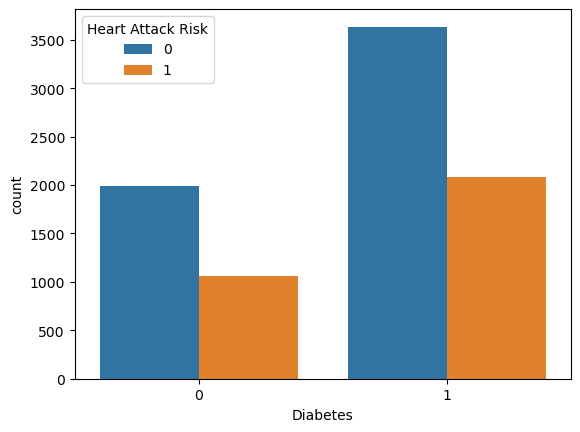

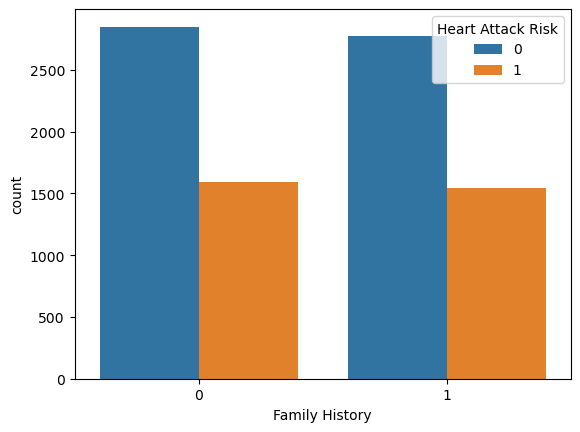

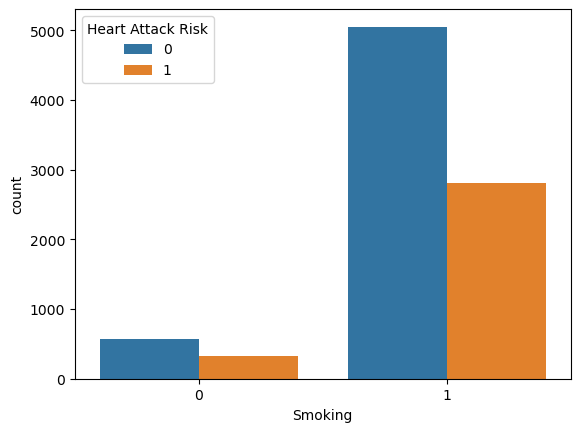

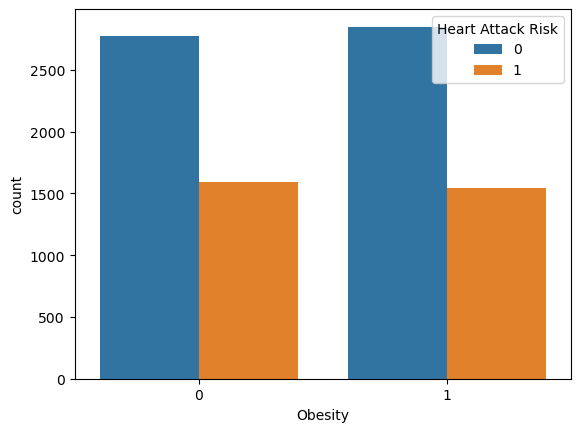

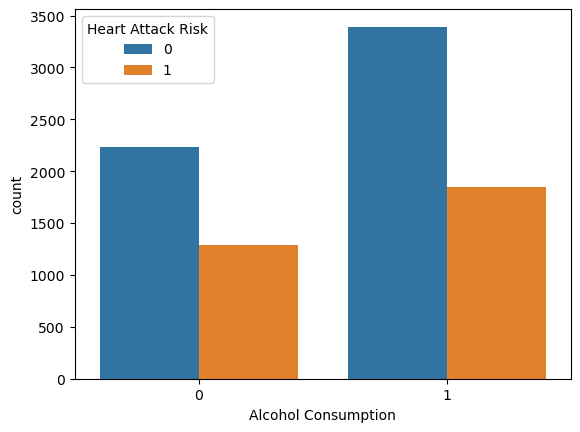

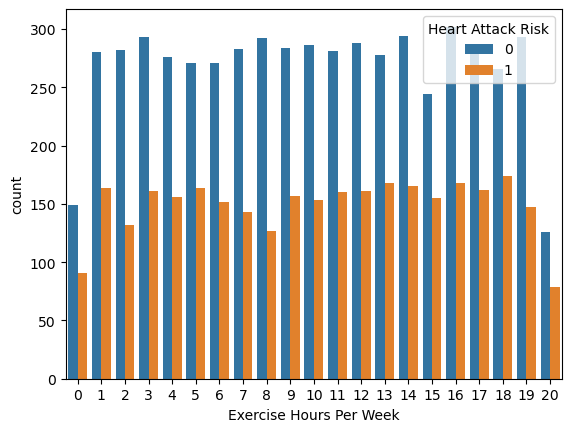

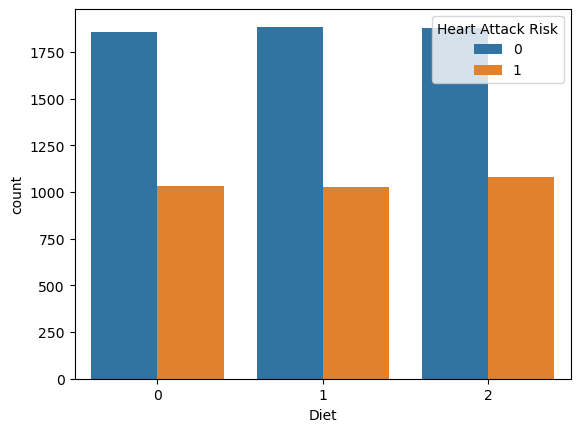

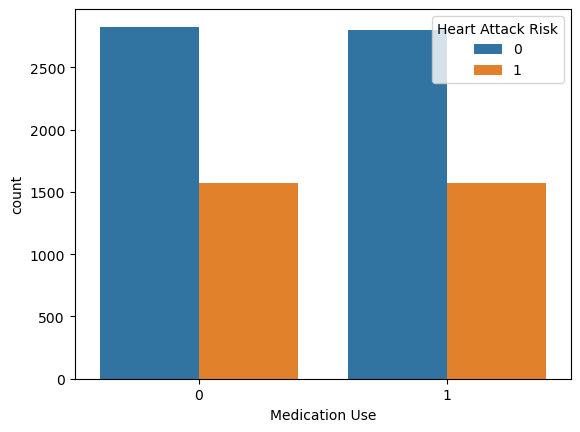

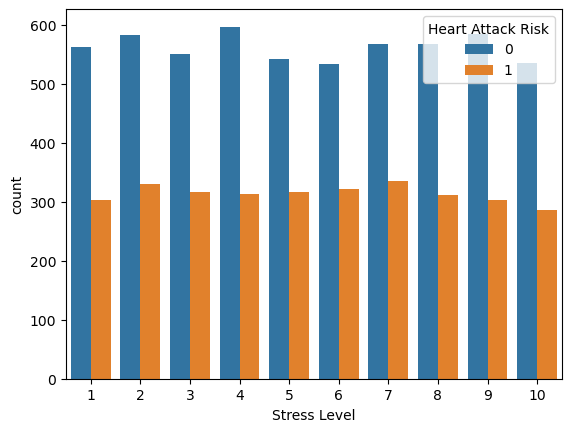

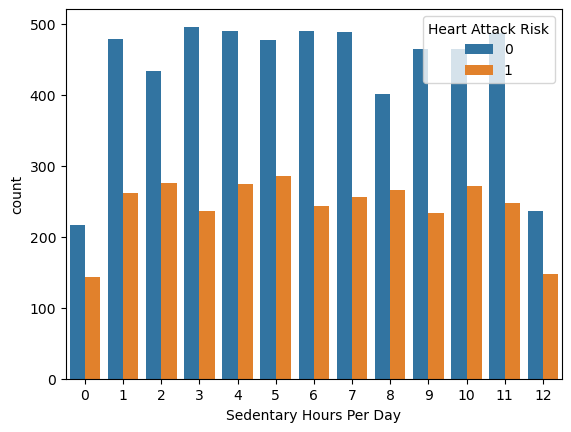

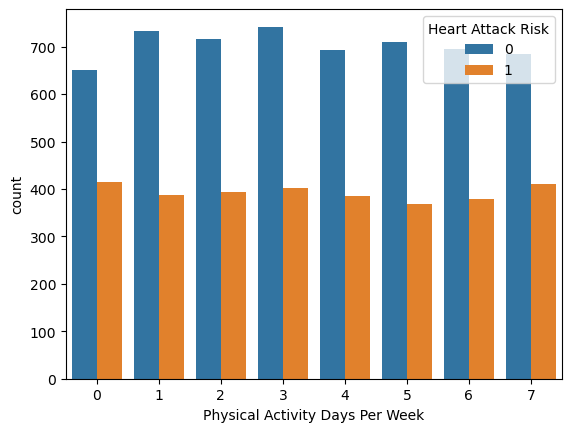

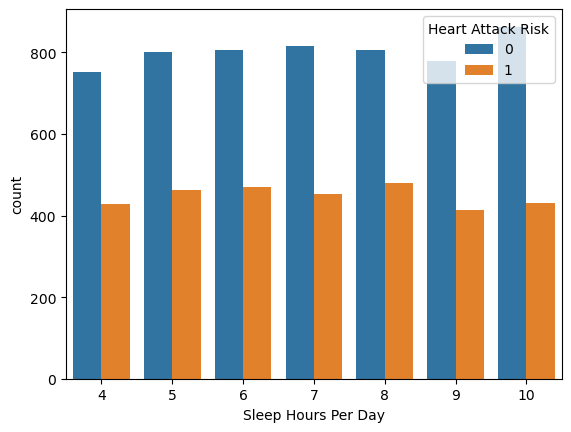

In [23]:
#Checking balance of categorical variables
#Leaving out Sex and previous risk since those were already done earlier
for cat in cat_features:
    sns.countplot(x=cat, data=df,hue='Heart Attack Risk')
    plt.show()

In [24]:
#Diabetes and Smoking are not balanced with more instances of smokers vs non smokers and more diabetics than non diabetics.

### Analyzing Feature Impact on Heart Attack Risk 

This seems to show that diet doest have much of an effect on heart attack risk which seems odd to me. 

Alcohal intake doesnt seem to make much of a difference either on heart attack risk. It looks like those who drink have report risk of heart attack slightly more frequently according to this data. 

In [25]:
#This plot suggests that previous heart problem has little to no influence of future heart problems 
#I find this to be very strange and am sceptical about the data.

In [26]:
df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,BP_Systolic,BP_Diastolic
0,67,Male,208,72,0,0,1,0,0,4,1,0,0,9,7,261404,31,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,Male,389,98,1,1,1,1,1,2,0,1,0,1,5,285768,27,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,Female,324,72,1,0,0,0,0,2,2,1,1,9,9,235282,28,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,Male,383,73,1,1,1,0,1,10,1,1,0,9,8,125640,36,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,Male,318,93,1,1,1,1,0,6,0,1,0,6,2,160555,22,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


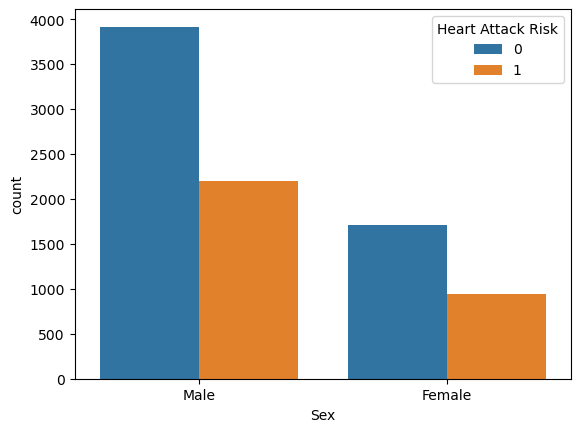

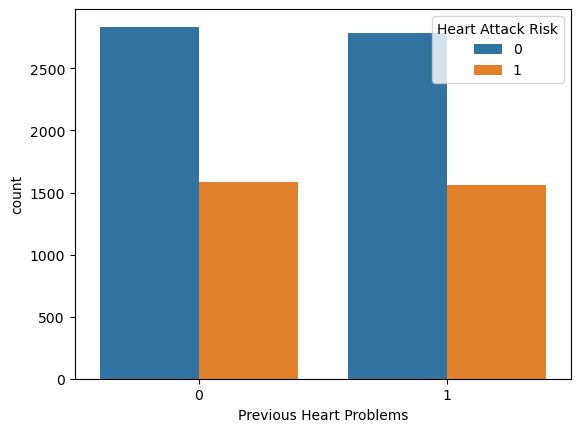

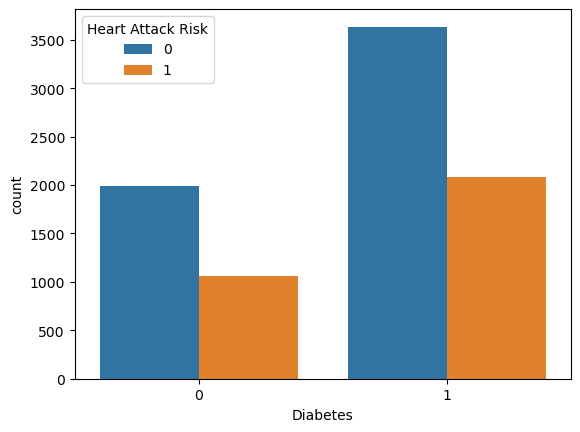

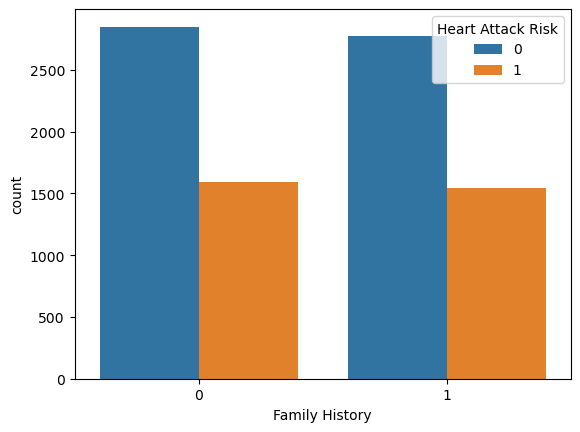

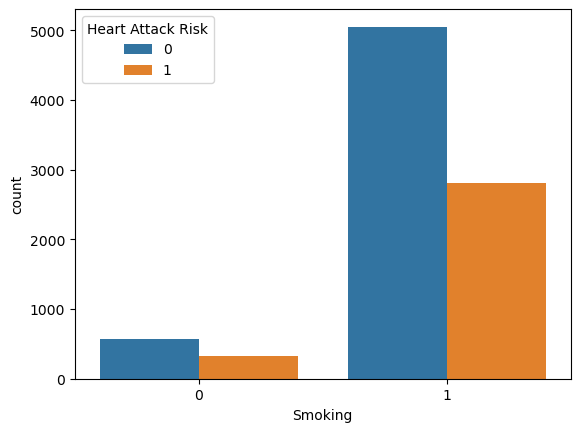

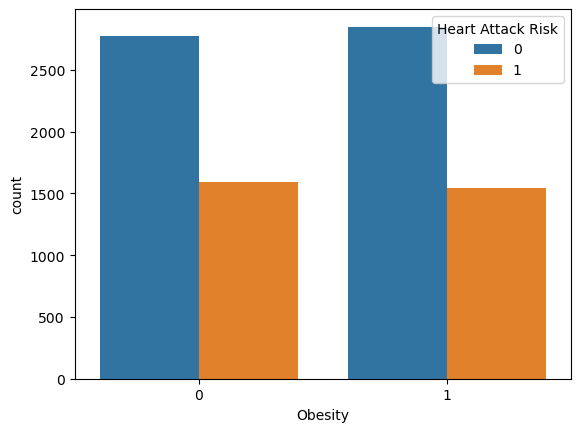

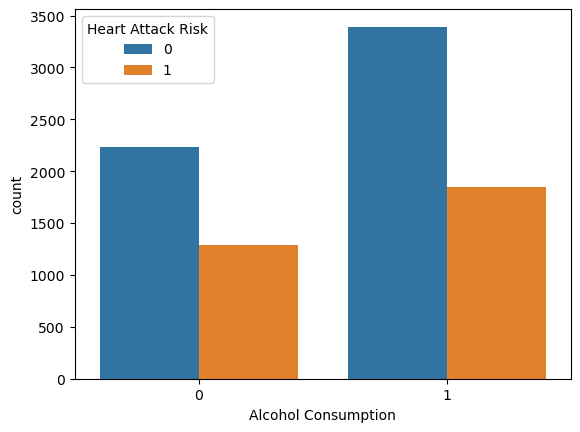

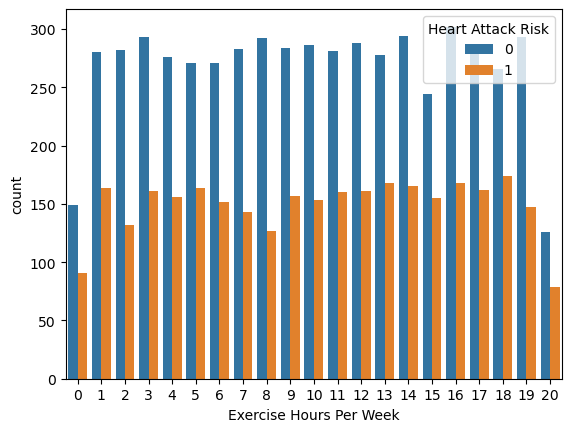

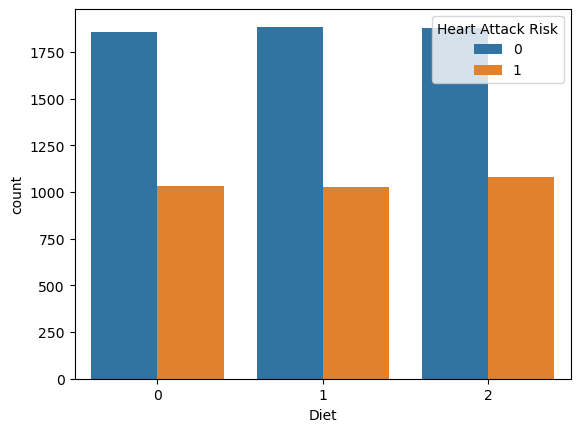

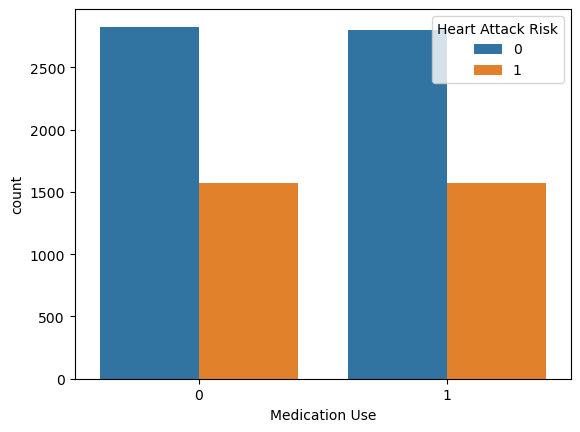

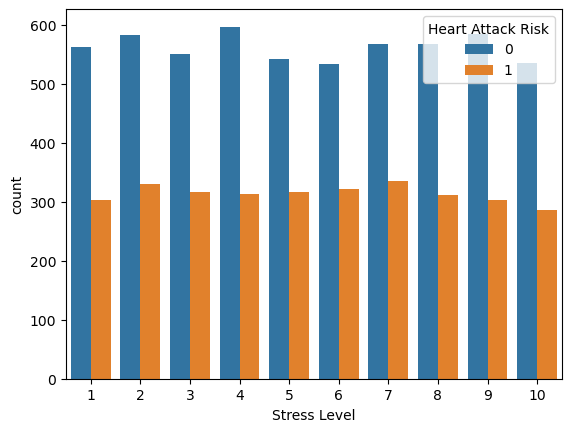

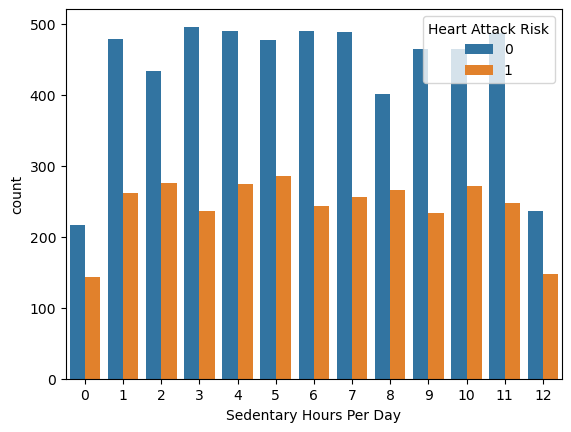

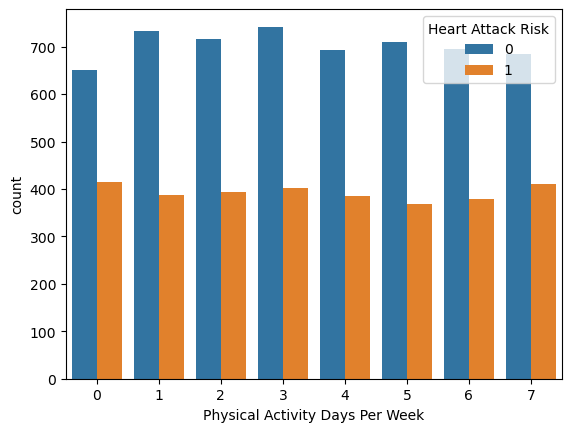

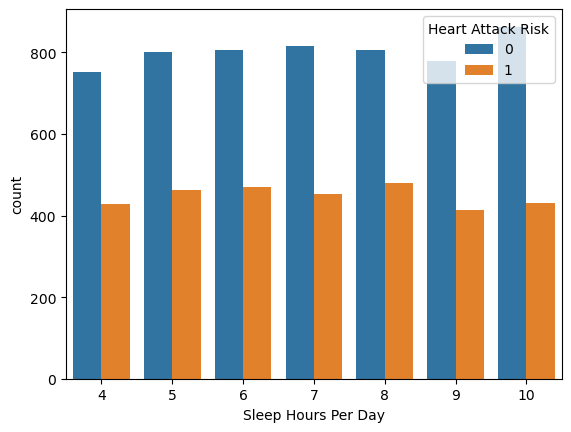

In [27]:
cat_features = ['Sex','Previous Heart Problems','Diabetes','Family History','Smoking','Obesity','Alcohol Consumption','Exercise Hours Per Week','Diet','Medication Use','Stress Level','Sedentary Hours Per Day','Physical Activity Days Per Week','Sleep Hours Per Day']
for cat in cat_features:
    sns.countplot(df,x=cat,hue='Heart Attack Risk')
    
    plt.show()

In [28]:
#There seems to be no feature that is a powerful predictor of heart attack risk which seems very strange.
#Perhaps combinations of features will be a more powerful in predictive power.

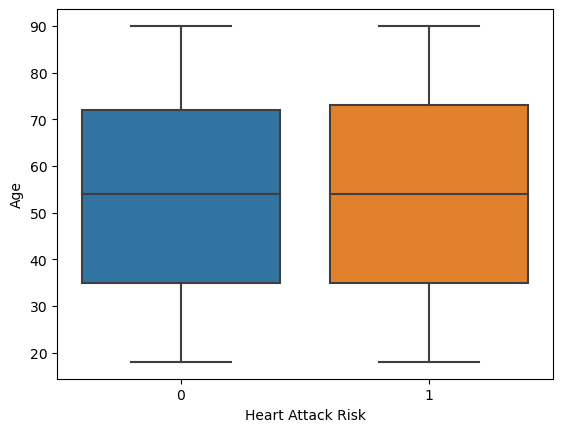

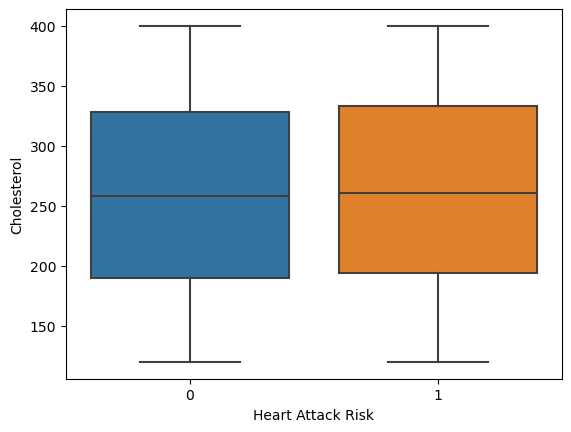

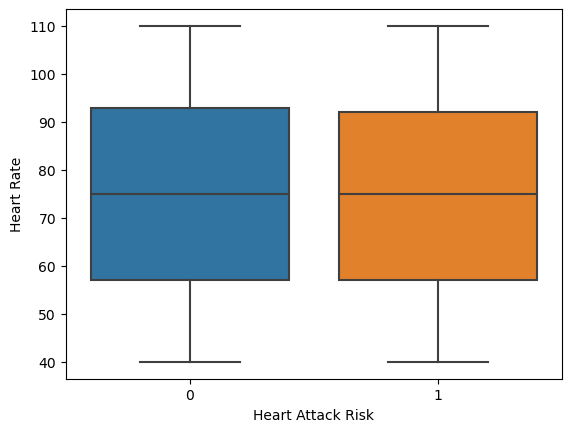

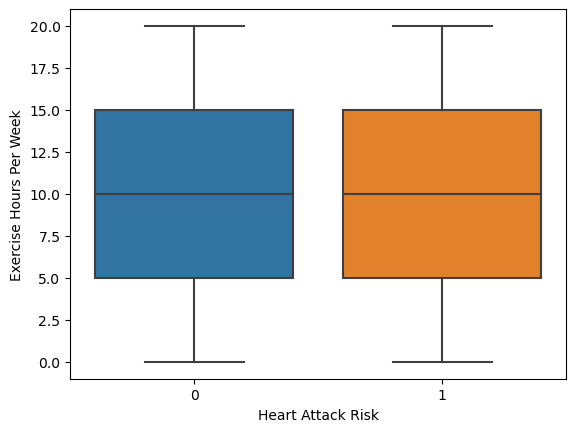

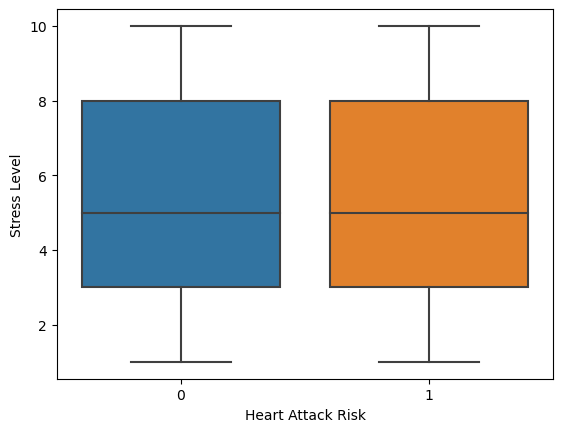

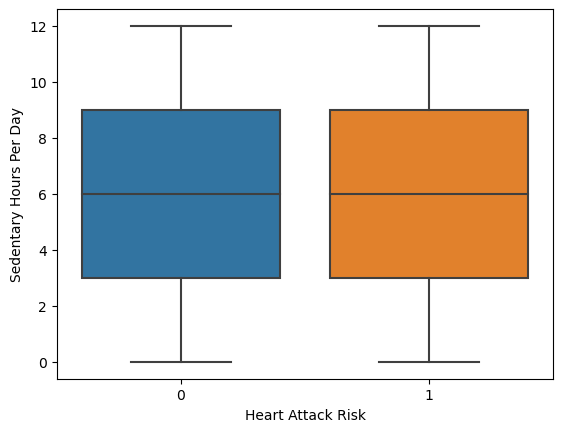

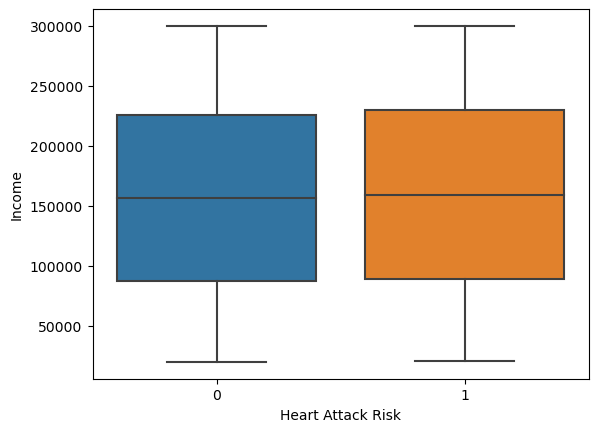

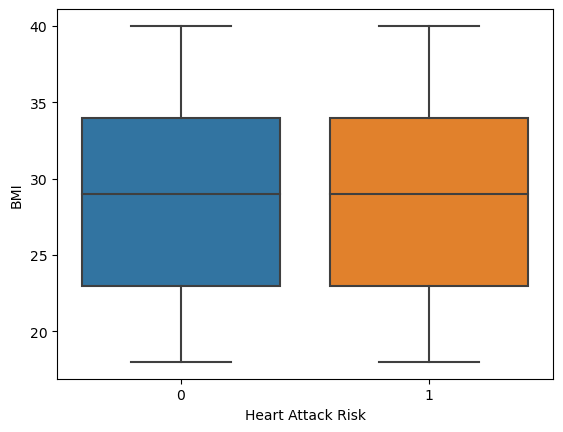

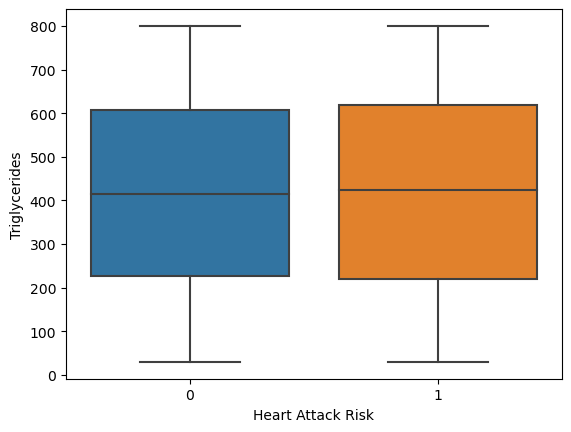

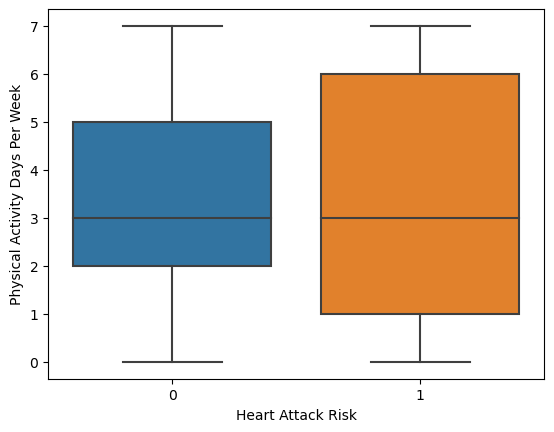

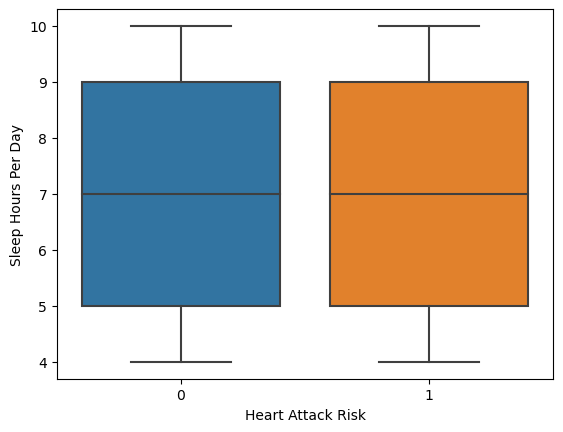

In [29]:
for col in numeric_cols:
    sns.boxplot(data=df,x='Heart Attack Risk',y=col)
    plt.show()

# 2/6 Left off here

In [30]:
df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,BP_Systolic,BP_Diastolic
0,67,Male,208,72,0,0,1,0,0,4,1,0,0,9,7,261404,31,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,Male,389,98,1,1,1,1,1,2,0,1,0,1,5,285768,27,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,Female,324,72,1,0,0,0,0,2,2,1,1,9,9,235282,28,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,Male,383,73,1,1,1,0,1,10,1,1,0,9,8,125640,36,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,Male,318,93,1,1,1,1,0,6,0,1,0,6,2,160555,22,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


### Regional Trends in Heart Attack Risk


In [31]:
risk_by_continent = df.groupby('Continent')['Heart Attack Risk'].count()

In [32]:
risk_by_continent_df = risk_by_continent.reset_index()


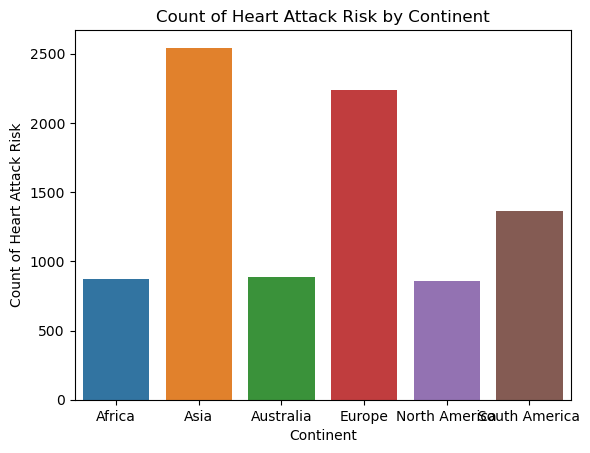

In [33]:
sns.barplot(data=risk_by_continent_df, x='Continent', y='Heart Attack Risk')

# Add labels and a title for clarity
plt.xlabel('Continent')
plt.ylabel('Count of Heart Attack Risk')
plt.title('Count of Heart Attack Risk by Continent')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Heart Attack Risk vs Age for each Continent')

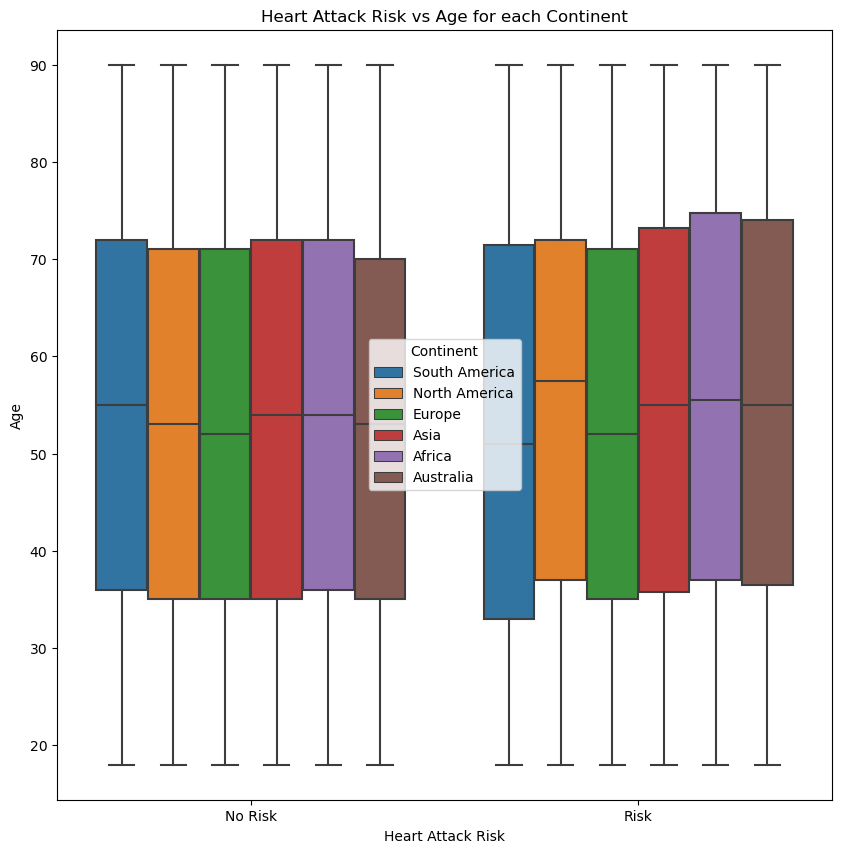

In [34]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(y='Age',x='Heart Attack Risk',data=df,hue='Continent')
ax.set_xticklabels(['No Risk','Risk'])
ax.set_title('Heart Attack Risk vs Age for each Continent')

C:\Users\mainf\AppData\Local\Temp\ipykernel_4352\2589066442.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No Risk','Risk'])


Text(0.5, 1.0, 'Heart Attack Risk vs Age and Obesity')

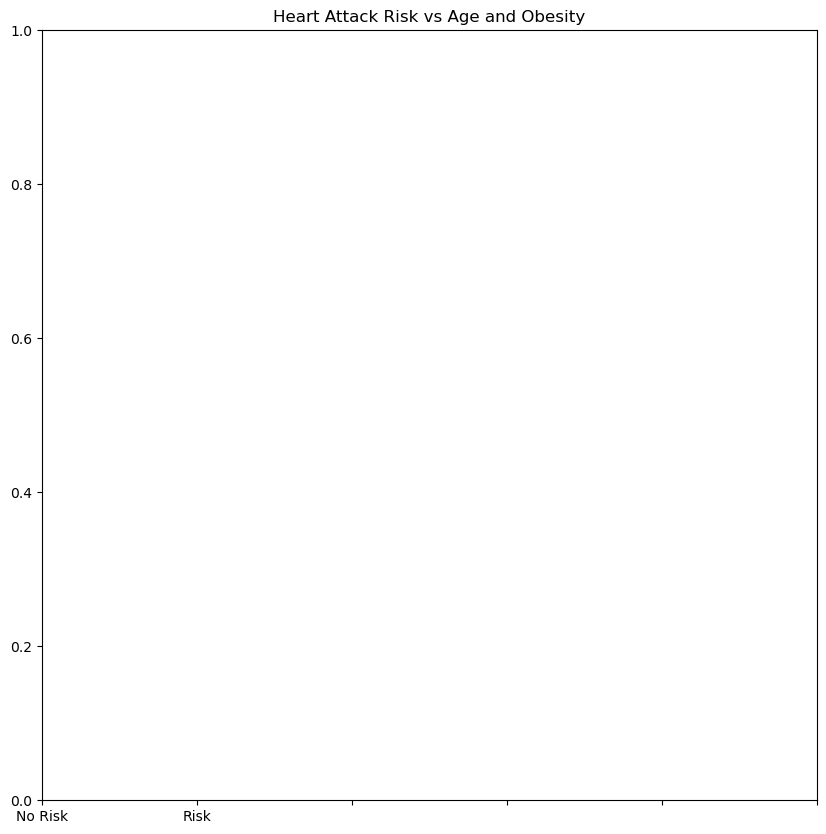

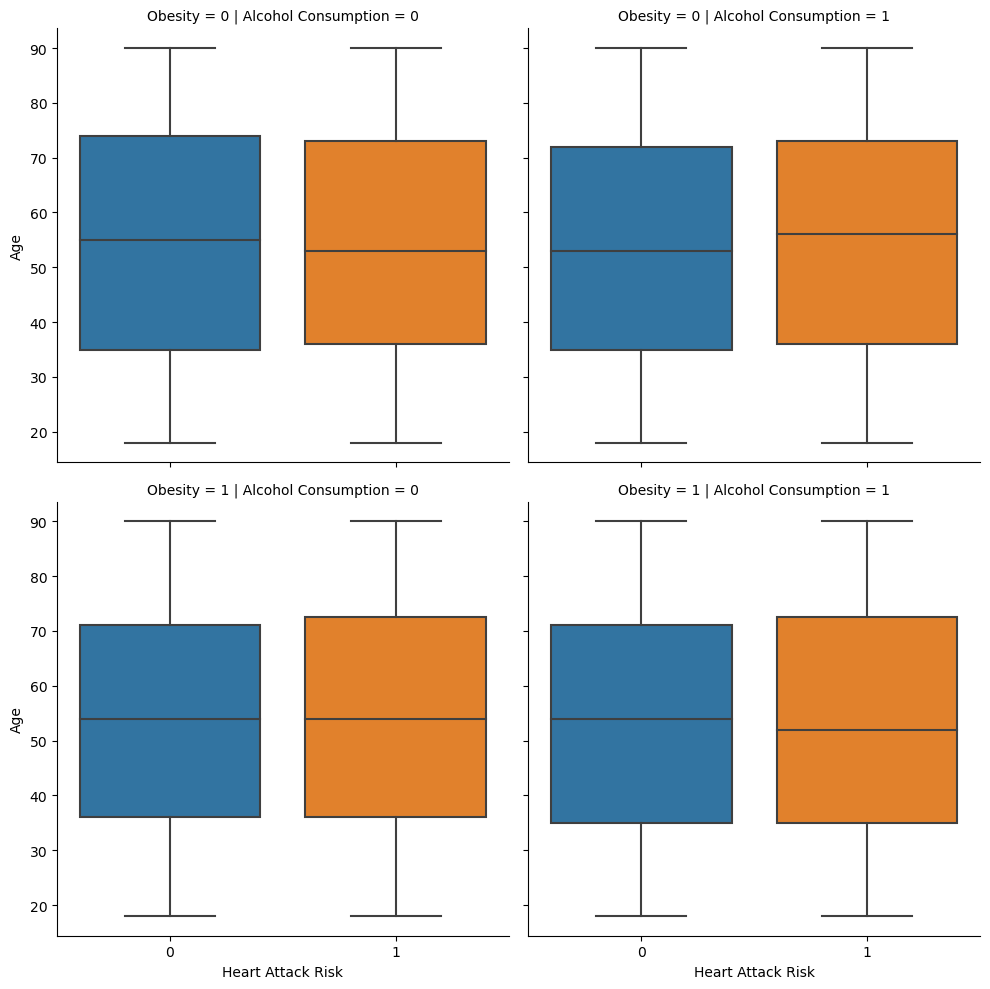

In [35]:
fig, ax = plt.subplots(figsize=(10,10))
sns.catplot(y='Age',x='Heart Attack Risk',data=df, col='Alcohol Consumption',row='Obesity',kind='box')
ax.set_xticklabels(['No Risk','Risk'])
ax.set_title('Heart Attack Risk vs Age and Obesity')

C:\Users\mainf\AppData\Local\Temp\ipykernel_4352\2589066442.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No Risk','Risk'])


Text(0.5, 1.0, 'Heart Attack Risk vs Age and Obesity')

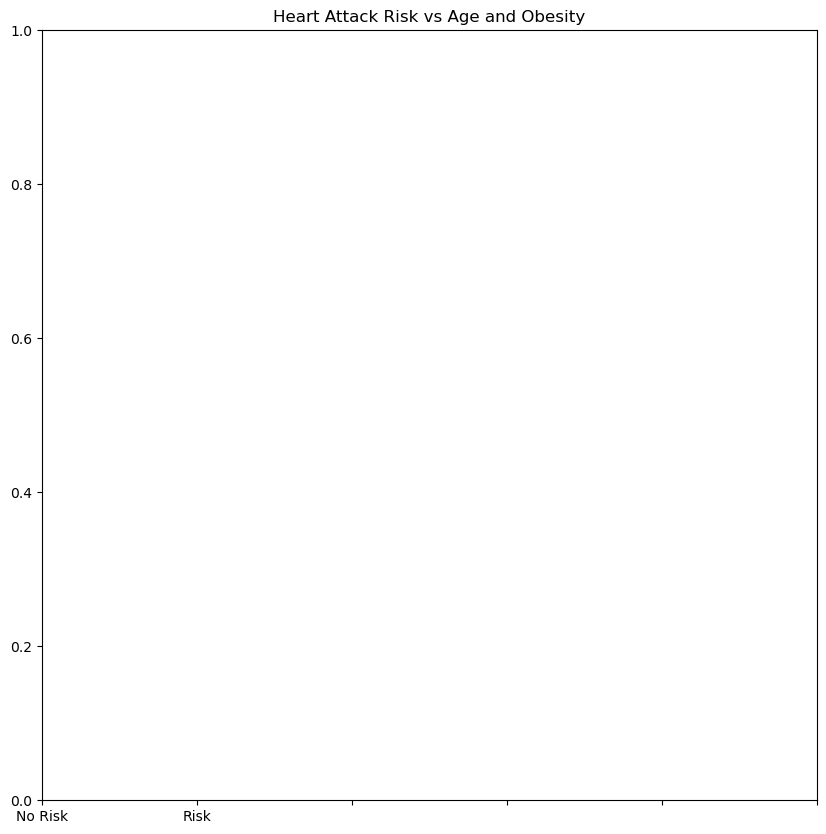

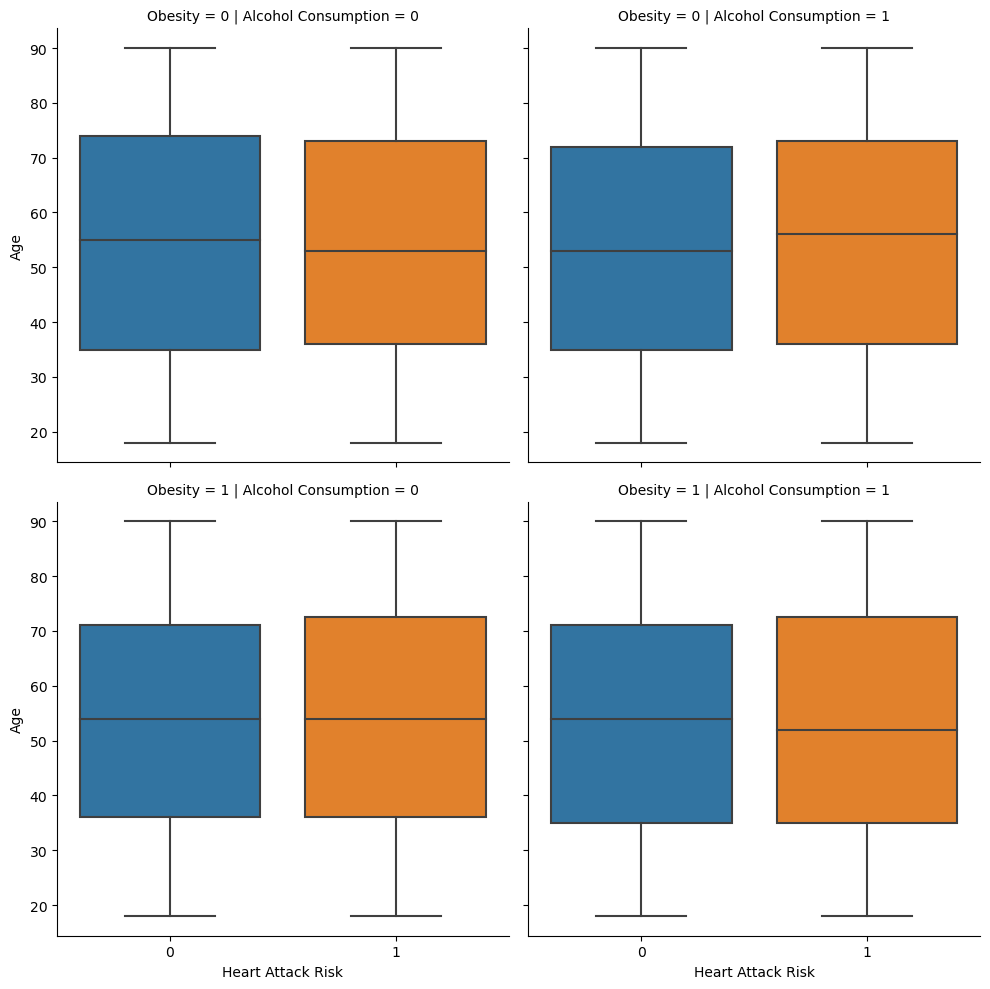

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
sns.catplot(y='Age',x='Heart Attack Risk',data=df, col='Alcohol Consumption',row='Obesity',kind='box')
ax.set_xticklabels(['No Risk','Risk'])
ax.set_title('Heart Attack Risk vs Age and Obesity')

<Axes: xlabel='Heart Attack Risk', ylabel='Heart Rate'>

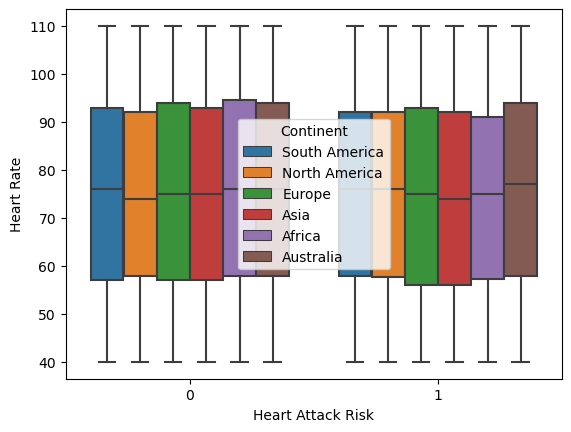

In [37]:
sns.boxplot(y='Heart Rate',x='Heart Attack Risk',data=df,hue='Continent')

<Axes: xlabel='Heart Attack Risk', ylabel='Triglycerides'>

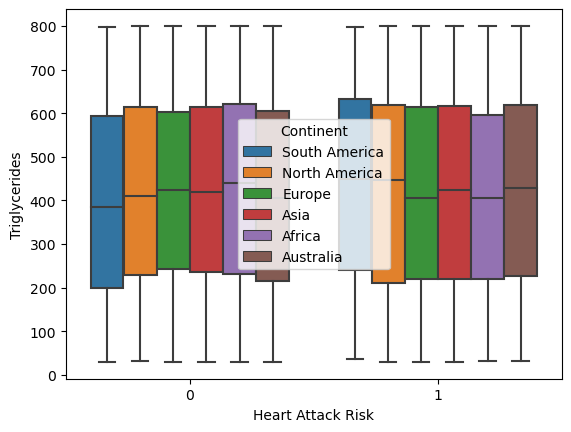

In [38]:
sns.boxplot(y='Triglycerides',x='Heart Attack Risk',data=df,hue='Continent')


In [39]:
df_corr = df[['Age','Cholesterol','Heart Rate','Exercise Hours Per Week','Sedentary Hours Per Day','Income','BMI','Triglycerides','Physical Activity Days Per Week','Sleep Hours Per Day','Heart Attack Risk']]

<Axes: >

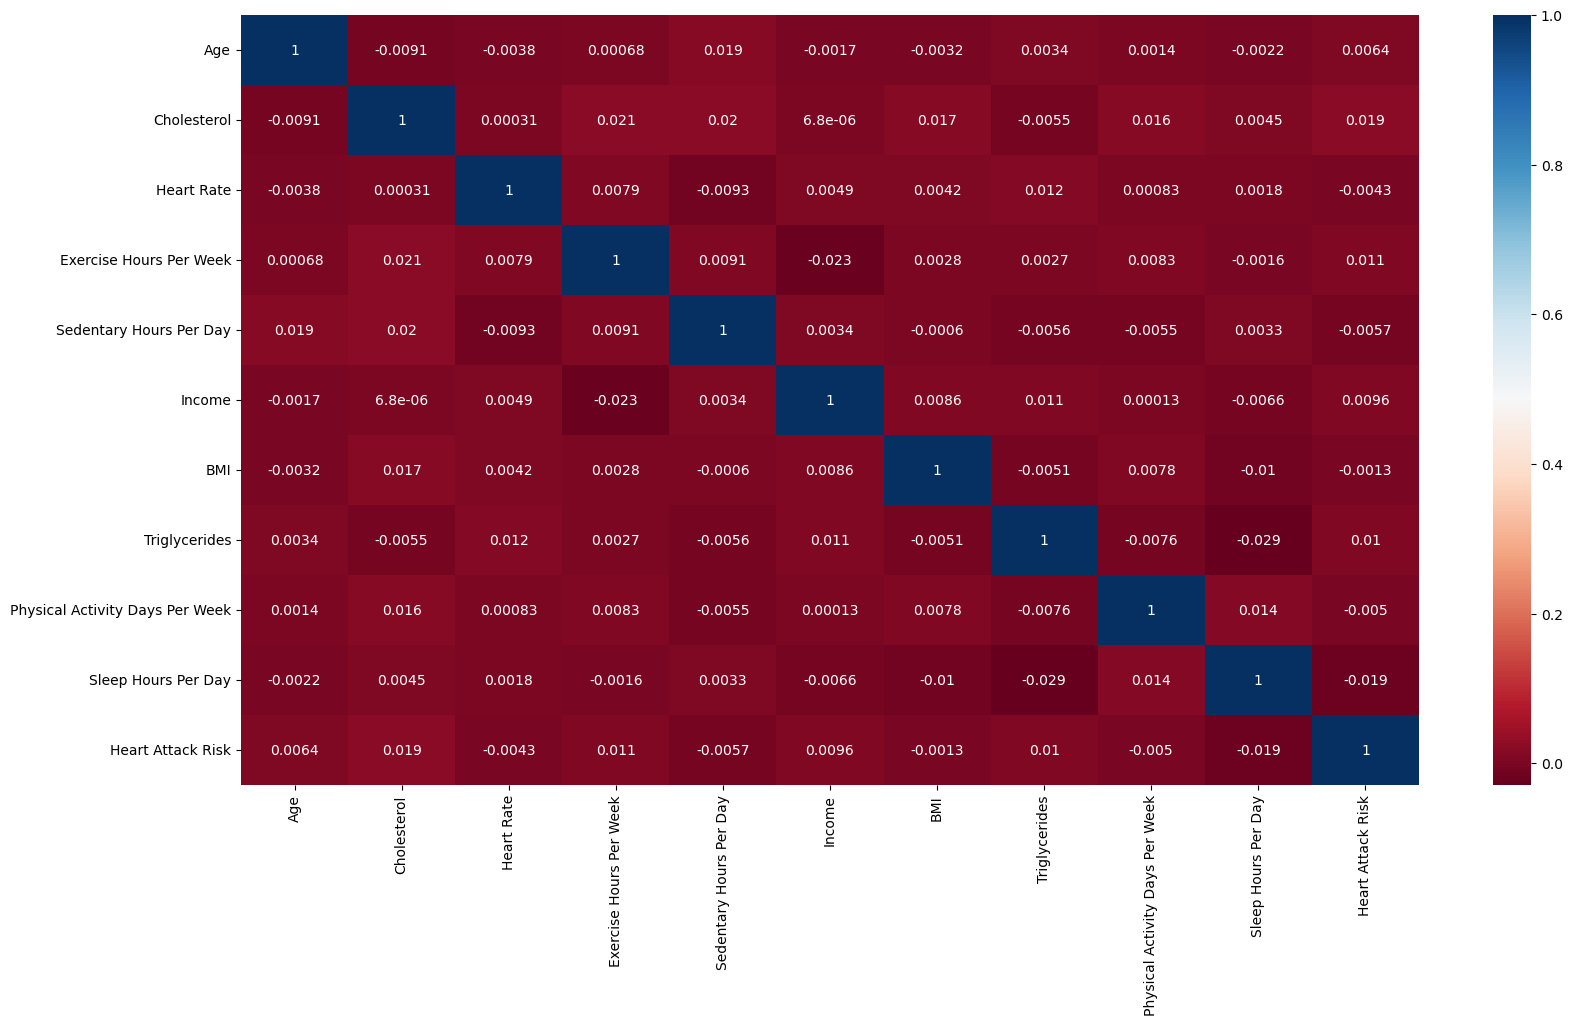

In [40]:
plt.figure(figsize = (19,10))
sns.heatmap(df_corr.corr(),cmap='RdBu',annot=True)

In [41]:
df.columns

Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk', 'BP_Systolic',
       'BP_Diastolic'],
      dtype='object')

In [42]:
df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,BP_Systolic,BP_Diastolic
0,67,Male,208,72,0,0,1,0,0,4,1,0,0,9,7,261404,31,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,Male,389,98,1,1,1,1,1,2,0,1,0,1,5,285768,27,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,Female,324,72,1,0,0,0,0,2,2,1,1,9,9,235282,28,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,Male,383,73,1,1,1,0,1,10,1,1,0,9,8,125640,36,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,Male,318,93,1,1,1,1,0,6,0,1,0,6,2,160555,22,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


<Axes: xlabel='Smoking', ylabel='Age'>

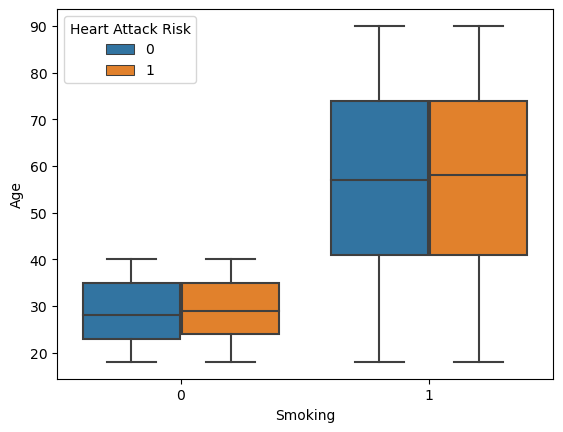

In [43]:
sns.boxplot(data=df,y='Age',x='Smoking',hue='Heart Attack Risk')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Argentina'),
  Text(1, 0, 'Canada'),
  Text(2, 0, 'France'),
  Text(3, 0, 'Thailand'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Japan'),
  Text(6, 0, 'Brazil'),
  Text(7, 0, 'South Africa'),
  Text(8, 0, 'United States'),
  Text(9, 0, 'Vietnam'),
  Text(10, 0, 'China'),
  Text(11, 0, 'Italy'),
  Text(12, 0, 'Spain'),
  Text(13, 0, 'India'),
  Text(14, 0, 'Nigeria'),
  Text(15, 0, 'New Zealand'),
  Text(16, 0, 'South Korea'),
  Text(17, 0, 'Australia'),
  Text(18, 0, 'Colombia'),
  Text(19, 0, 'United Kingdom')])

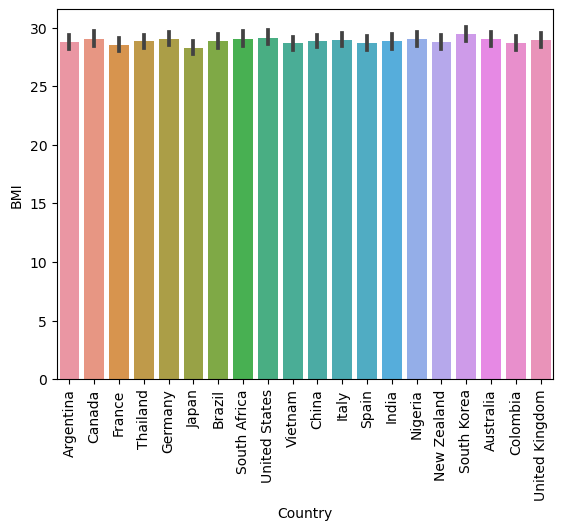

In [44]:
sns.barplot(data=df,x='Country',y='BMI')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'South America'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'Asia'),
  Text(4, 0, 'Africa'),
  Text(5, 0, 'Australia')])

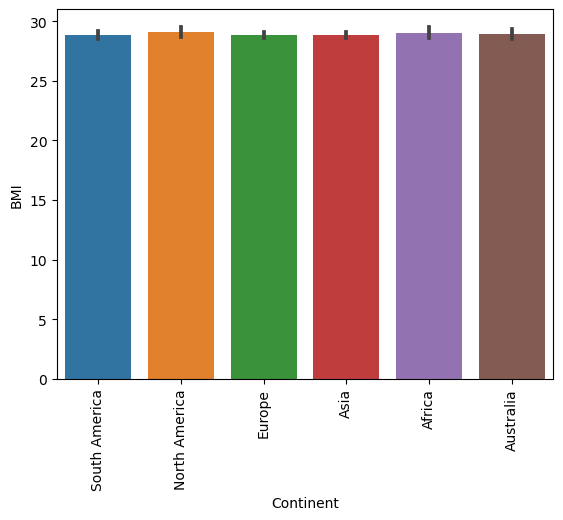

In [45]:
sns.barplot(data=df,x='Continent',y='BMI')
plt.xticks(rotation=90)

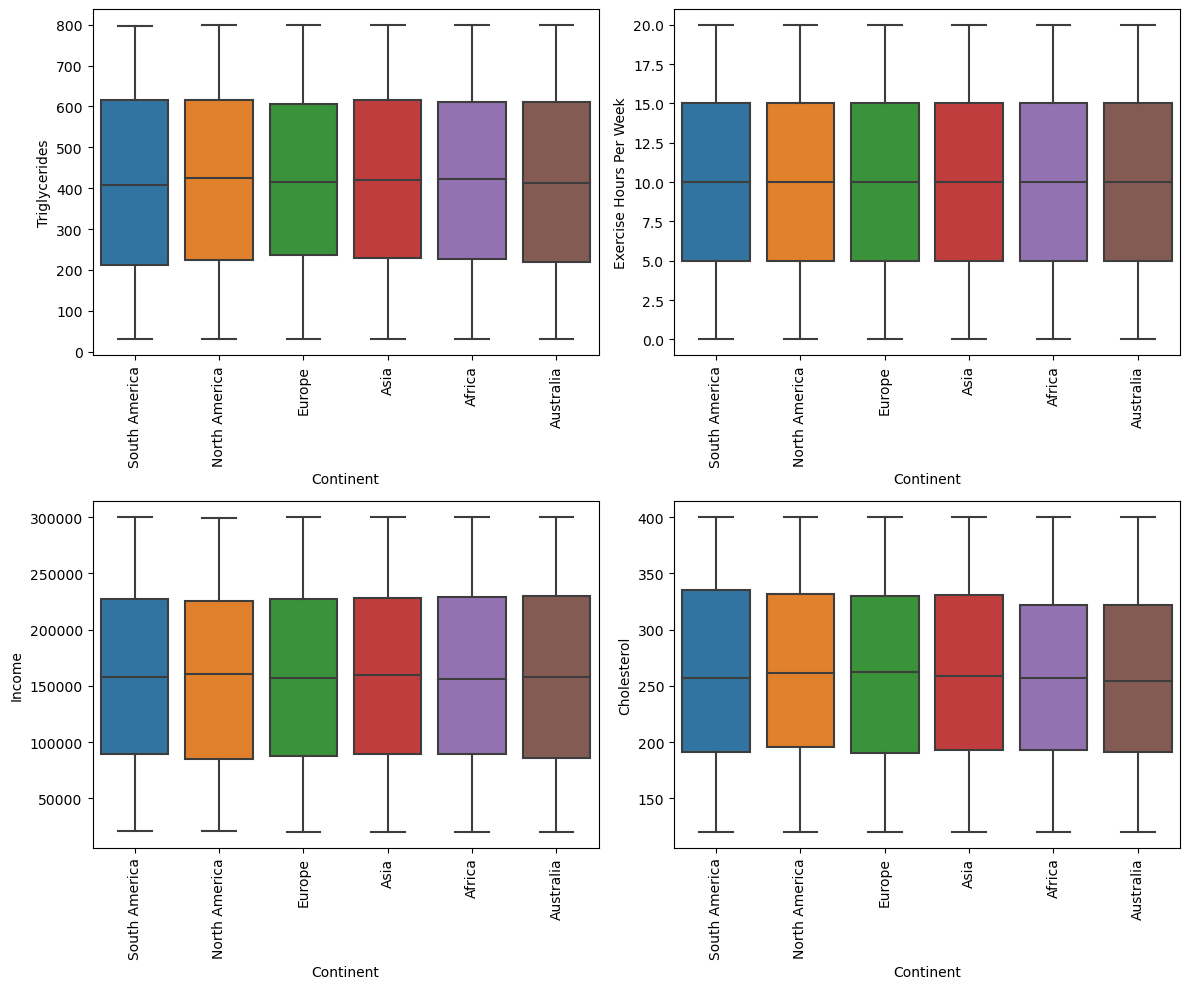

In [46]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(12,10))
sns.boxplot(data=df,x='Continent',y='Triglycerides',ax=ax[0,0])
sns.boxplot(data=df,x='Continent',y='Exercise Hours Per Week',ax=ax[0,1])
sns.boxplot(data=df,x='Continent',y='Income',ax=ax[1,0])
sns.boxplot(data=df,x='Continent',y='Cholesterol',ax=ax[1,1])
for axis in ax.flat:
    for label in axis.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()

In [47]:
df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,BP_Systolic,BP_Diastolic
0,67,Male,208,72,0,0,1,0,0,4,1,0,0,9,7,261404,31,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,Male,389,98,1,1,1,1,1,2,0,1,0,1,5,285768,27,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,Female,324,72,1,0,0,0,0,2,2,1,1,9,9,235282,28,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,Male,383,73,1,1,1,0,1,10,1,1,0,9,8,125640,36,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,Male,318,93,1,1,1,1,0,6,0,1,0,6,2,160555,22,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


C:\Users\mainf\AppData\Local\Temp\ipykernel_4352\305071422.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df_corr_2.corr(),cmap='RdBu',annot=True)


<Axes: >

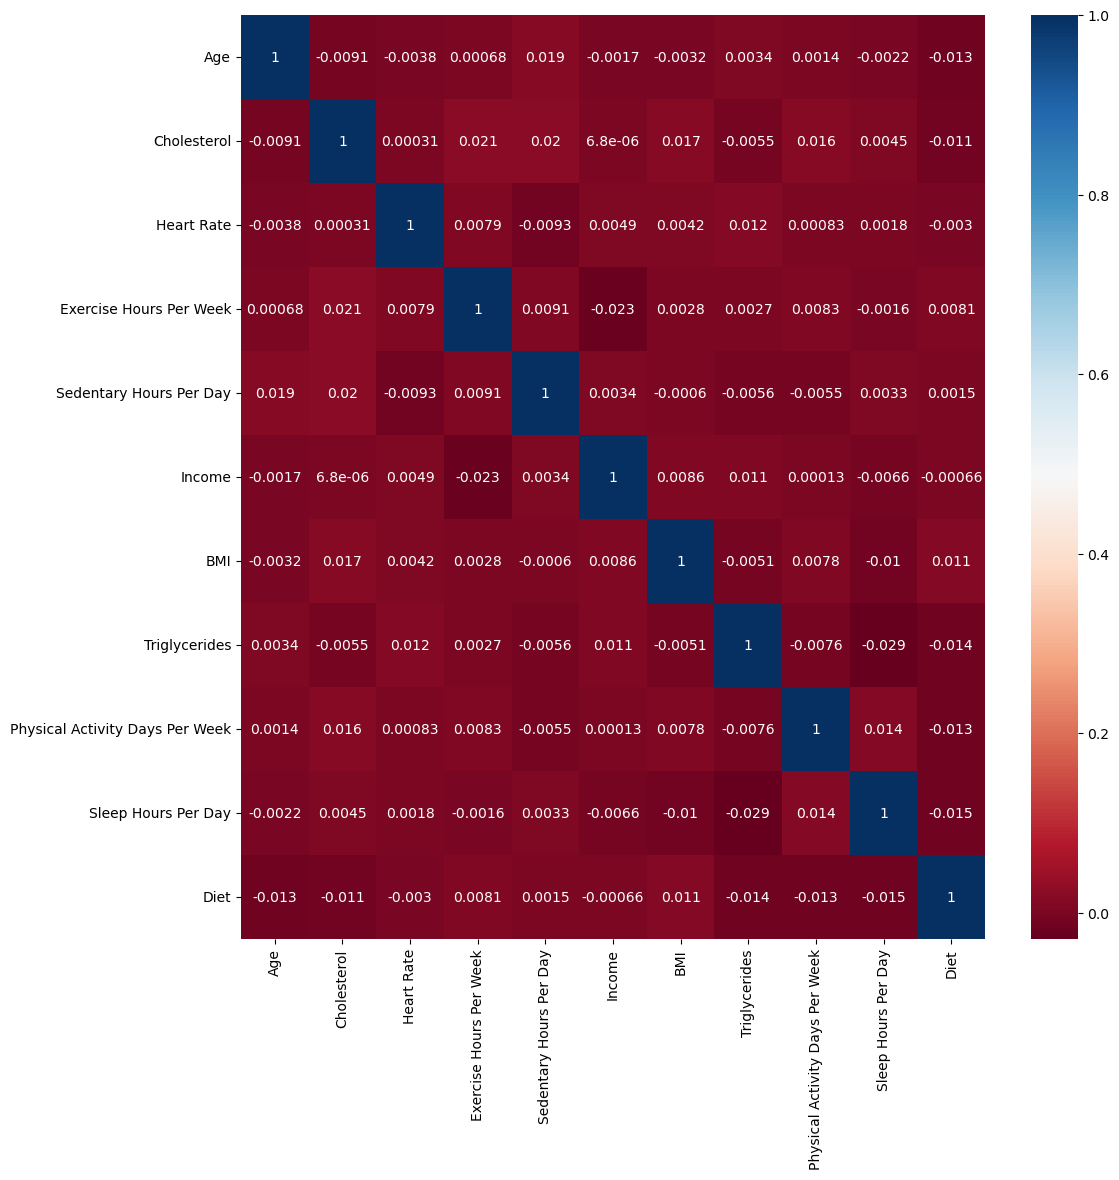

In [48]:
df_corr_2 = df[['Age','Cholesterol','Heart Rate','Exercise Hours Per Week','Sedentary Hours Per Day','Income','BMI','Triglycerides','Physical Activity Days Per Week','Sleep Hours Per Day','BP_Systolic','BP_Diastolic','Diet']]
plt.figure(figsize=(12,12))
sns.heatmap(data=df_corr_2.corr(),cmap='RdBu',annot=True)               

In [49]:
df.dtypes

Age                                 int64
Sex                                object
Cholesterol                         int64
Heart Rate                          int64
Diabetes                            int64
Family History                      int64
Smoking                             int64
Obesity                             int64
Alcohol Consumption                 int64
Exercise Hours Per Week             int64
Diet                                int64
Previous Heart Problems             int64
Medication Use                      int64
Stress Level                        int64
Sedentary Hours Per Day             int64
Income                              int64
BMI                                 int64
Triglycerides                       int64
Physical Activity Days Per Week     int64
Sleep Hours Per Day                 int64
Country                            object
Continent                          object
Hemisphere                         object
Heart Attack Risk                 

In [50]:
#Changing the data types of these columns into integer so that the model can better interpret them
df[['BP_Diastolic','BP_Systolic']] = df[['BP_Diastolic','BP_Systolic']].astype(int)

In [51]:
df_dummies.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,BP_Systolic,BP_Diastolic,Country_Australia,Country_Brazil,Country_Canada,Country_China,Country_Colombia,Country_France,Country_Germany,Country_India,Country_Italy,Country_Japan,Country_New Zealand,Country_Nigeria,Country_South Africa,Country_South Korea,Country_Spain,Country_Thailand,Country_United Kingdom,Country_United States,Country_Vietnam,Hemisphere_Southern Hemisphere,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Sex_Male
0,67,208,72,0,0,1,0,0,4,1,0,0,9,7,261404,31,286,0,6,0,158,88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,21,389,98,1,1,1,1,1,2,0,1,0,1,5,285768,27,235,1,7,0,165,93,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,21,324,72,1,0,0,0,0,2,2,1,1,9,9,235282,28,587,4,4,0,174,99,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,84,383,73,1,1,1,0,1,10,1,1,0,9,8,125640,36,378,3,4,0,163,100,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,66,318,93,1,1,1,1,0,6,0,1,0,6,2,160555,22,231,1,5,0,91,88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [52]:
df_dummies.columns

Index(['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk', 'BP_Systolic', 'BP_Diastolic', 'Country_Australia',
       'Country_Brazil', 'Country_Canada', 'Country_China', 'Country_Colombia',
       'Country_France', 'Country_Germany', 'Country_India', 'Country_Italy',
       'Country_Japan', 'Country_New Zealand', 'Country_Nigeria',
       'Country_South Africa', 'Country_South Korea', 'Country_Spain',
       'Country_Thailand', 'Country_United Kingdom', 'Country_United States',
       'Country_Vietnam', 'Hemisphere_Southern Hemisphere', 'Continent_Asia',
       'Continent_Australia', 'Continent_Europe', 'Continent_North America',
       'Continent_South America

In [53]:
cols = ['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day'
       , 'BP_Systolic', 'BP_Diastolic', 'Sex_Male']

In [54]:
X = np.array(df_dummies[cols])
        
y = df_dummies['Heart Attack Risk'].values

In [55]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Modeling

In [56]:
# I will do a preliminary test to see which base model is giving the best predictions. These are the models I wil test
models = {'Logistic_Regression':LogisticRegression(),
          'Random_Forest':RandomForestClassifier(),
          'XGBoost':xgb.XGBClassifier(),
          'SVM':SVC(kernel = 'rbf'), 
          'KNN':KNeighborsClassifier(n_neighbors = 10),
          'Naive_Bayes':GaussianNB()}

#This is testing for the best model with the unbalanced DF
for i in models:
    model = models[i]
    scores = cross_val_score(model, X, y, cv=kf, scoring='f1_macro')

    # Print the average accuracy across all folds
    print(f"Average F1 for {i}: ", scores.mean())

Average F1 for Logistic_Regression:  0.39086775446413213
Average F1 for Random_Forest:  0.40751133961882474
Average F1 for XGBoost:  0.49539401809703093
Average F1 for SVM:  0.39086775446413213
Average F1 for KNN:  0.45201518928303264
Average F1 for Naive_Bayes:  0.39086775446413213


The original dataframe produced very poor results for identifying positives and the dataset that was balanced predicts better for positve vales. The random forest seems best for the original DF. I will dive deeper into the SVM for the modified df because its overall performance is good, but it has a higher recall for positives than most of the models which is very important for medical diagnostics. I would rather have a false positive than a fales negative

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2 , random_state = 123)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)

In [59]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)


# I want to set some generic paremeters and test model performance to get an idea of what models will be best
models_base_hypers = {
    'Logistic_Regression': LogisticRegression(C=1, solver='liblinear', penalty='l2'),
    'Random_Forest': RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1),
    'XGBoost': xgb.XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8),
    'SVM': SVC(kernel='rbf', C=1, gamma=0.1),

}
for i in models_base_hypers:
    model = models_base_hypers[i]
    model.fit(X_train_resample,y_train_resample)
    y_pred = model.predict(X_test)
    print(f'{i}s report:\n {classification_report(y_test,y_pred)}')

Logistic_Regressions report:
               precision    recall  f1-score   support

           0       0.66      0.52      0.58      1141
           1       0.36      0.50      0.42       612

    accuracy                           0.51      1753
   macro avg       0.51      0.51      0.50      1753
weighted avg       0.55      0.51      0.52      1753

Random_Forests report:
               precision    recall  f1-score   support

           0       0.65      0.87      0.74      1141
           1       0.33      0.12      0.18       612

    accuracy                           0.61      1753
   macro avg       0.49      0.49      0.46      1753
weighted avg       0.54      0.61      0.54      1753

XGBoosts report:
               precision    recall  f1-score   support

           0       0.65      0.90      0.76      1141
           1       0.34      0.10      0.15       612

    accuracy                           0.62      1753
   macro avg       0.50      0.50      0.45      1753
we

In [60]:
lg_model = LogisticRegression(C=1, solver='liblinear', penalty='l2')

In [61]:
lg_model.fit(X_train_resample, y_train_resample)

LogisticRegression(C=1, solver='liblinear')

In [62]:
coefficients = lg_model.coef_[0]

In [63]:
feature_names = cols

importance = zip(feature_names, coefficients)

# Sort by absolute value of coefficient
sorted_importance = sorted(importance, key=lambda x: abs(x[1]), reverse=True)

for feature, coef in sorted_importance:
    print(f'{feature}: {coef}')
    

BP_Systolic: 0.06478622291414092
Sleep Hours Per Day: -0.04821880242752499
Cholesterol: 0.044075627196587426
Sex_Male: 0.037049724799233665
Exercise Hours Per Week: 0.03520666763225254
Sedentary Hours Per Day: -0.03415553927437135
Diabetes: 0.031789314824913296
BP_Diastolic: -0.028373329044264664
Triglycerides: 0.02533971014446619
BMI: -0.022402308751213424
Obesity: -0.022024578855860472
Alcohol Consumption: -0.015941491845437576
Age: 0.01237835420279277
Income: 0.011801546603481698
Medication Use: -0.006800119250348404
Heart Rate: -0.005806194281477941
Stress Level: 0.005382023848121192
Previous Heart Problems: 0.004732515236382526
Diet: -0.00415296917307076
Physical Activity Days Per Week: -0.0034805920927002605
Family History: 0.0006751811963848715
Smoking: 0.00030013616756100424


In [67]:
sorted_features = []
for feature, coef in sorted_importance:
    sorted_features.append(feature)


In [73]:
df_dummies = df_dummies[sorted_features]

In [75]:
#X is ordered by absolute value of feature importance
X = np.array(df_dummies)

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2 , random_state = 123)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)

In [79]:
from sklearn.feature_selection import SequentialFeatureSelector

for i in range(1,10):

    sfs = SequentialFeatureSelector(estimator=lg_model, n_features_to_select=i, direction='forward')
    sfs = sfs.fit(X_train_resample, y_train_resample)
    X_train_selected = sfs.transform(X_train_resample)
    X_test_selected = sfs.transform(X_test) 

    lg_model.fit(X_train_selected,y_train_resample)

    y_pred = lg_model.predict(X_test_selected)
    print(f"Number of Features: {i}")
    print(classification_report(y_test,y_pred))

Number of Features: 1
              precision    recall  f1-score   support

           0       0.66      0.60      0.63      1141
           1       0.36      0.42      0.38       612

    accuracy                           0.54      1753
   macro avg       0.51      0.51      0.51      1753
weighted avg       0.55      0.54      0.54      1753

Number of Features: 2
              precision    recall  f1-score   support

           0       0.64      0.57      0.60      1141
           1       0.33      0.41      0.37       612

    accuracy                           0.51      1753
   macro avg       0.49      0.49      0.48      1753
weighted avg       0.53      0.51      0.52      1753

Number of Features: 3
              precision    recall  f1-score   support

           0       0.64      0.54      0.59      1141
           1       0.34      0.44      0.38       612

    accuracy                           0.51      1753
   macro avg       0.49      0.49      0.49      1753
weighted

In [93]:
X_train_reduced_featurues = X_train_resample[:,:4]
X_test_reduced_featurues = X_test[:,:4]

In [94]:
X_test_reduced_featurues

array([[ 0.34030017, -0.50688273,  1.13708696,  0.6553208 ],
       [-1.66734925,  1.50060198, -1.2027818 , -1.52597018],
       [-0.11426196,  0.49685963,  0.79043973,  0.6553208 ],
       ...,
       [ 1.36306497,  0.9987308 ,  0.419032  ,  0.6553208 ],
       [ 1.40094514,  0.49685963, -0.732332  ,  0.6553208 ],
       [ 0.18877946, -1.00875391,  0.23332813, -1.52597018]])

In [95]:
lg_model.fit(X_train_reduced_featurues,y_train_resample)

LogisticRegression(C=1, solver='liblinear')

In [96]:
y_pred = lg_model.predict(X_test_reduced_featurues)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.52      0.58      1141
           1       0.35      0.47      0.40       612

    accuracy                           0.50      1753
   macro avg       0.50      0.50      0.49      1753
weighted avg       0.54      0.50      0.51      1753



In [102]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Expanded to include 'l1' and 'elasticnet'
    'C': np.logspace(-4, 4, 10),  # Using log space for C values for a more refined search
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Added 'liblinear' and 'saga'
    'max_iter': [100, 200, 500, 1000],  # Expanded range of max_iter
    'class_weight': [None, 'balanced'],  # To handle imbalanced classes
    'l1_ratio': np.linspace(0, 1, 10),  # Only for 'elasticnet' penalty; a range of mix ratios between l1 and l2 penalties
}

grid_search = GridSearchCV(estimator=lg_model, param_grid=param_grid, cv=10, verbose=2, n_jobs=-1,scoring='f1_macro')

grid_search.fit(X_train_reduced_featurues,y_train_resample)
print("Best parameters:", grid_search.best_params_)
print("Best estimator:", grid_search.best_estimator_)
print("Best estimator:", grid_search.best_score_)

Fitting 10 folds for each of 16000 candidates, totalling 160000 fits


C:\Users\mainf\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
64000 fits failed out of a total of 160000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mainf\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mainf\anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mainf\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    s

Best parameters: {'C': 0.046415888336127774, 'class_weight': None, 'l1_ratio': 0.2222222222222222, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'saga'}
Best estimator: LogisticRegression(C=0.046415888336127774, l1_ratio=0.2222222222222222,
                   penalty='elasticnet', solver='saga')
Best estimator: 0.5148858717168838


C:\Users\mainf\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.33333328 ...        nan 0.51276673 0.51276673]
  warnings.warn(


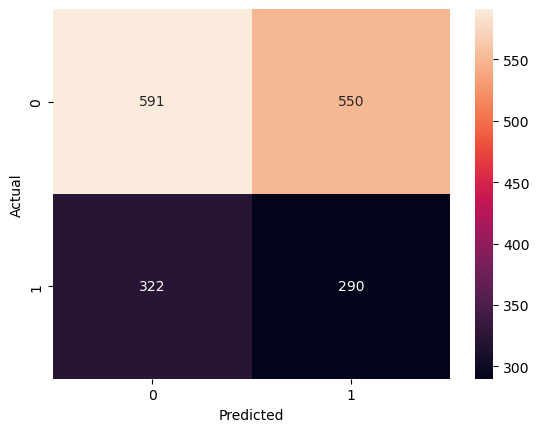

In [103]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test is your test labels and y_pred is your model predictions
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [143]:
cm

array([[591, 550],
       [322, 290]], dtype=int64)

In [104]:
errors = X_test_reduced_featurues[(y_test != y_pred)]  # Instances where prediction was wrong
corrects = X_test_reduced_featurues[(y_test == y_pred)] 

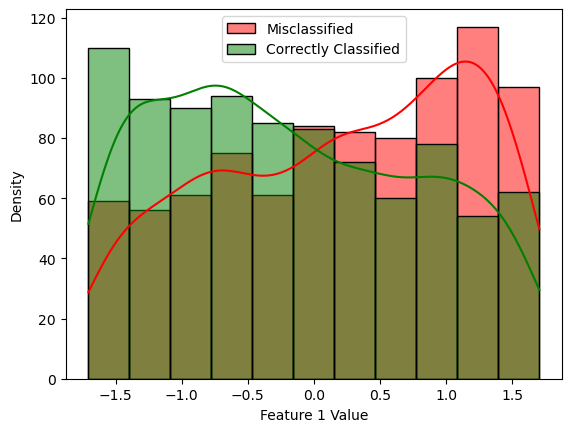

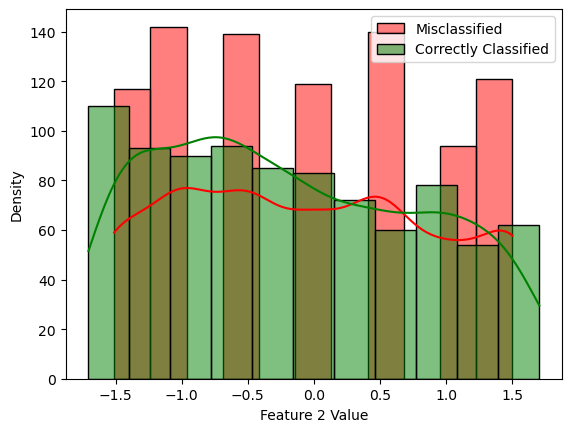

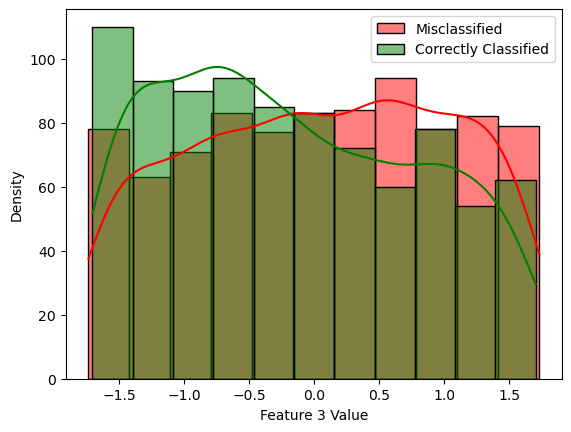

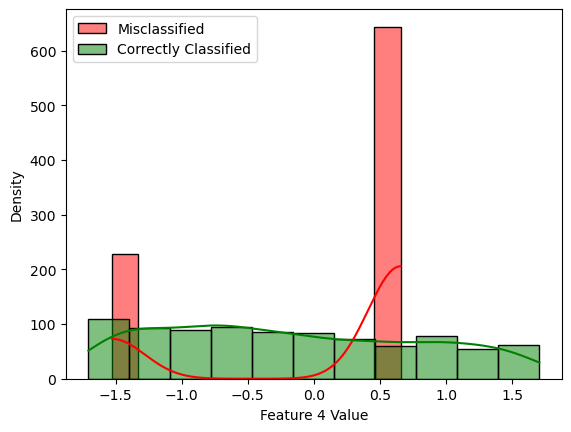

In [132]:
for i in range(0,4):
    sns.histplot(x=errors[:, i], color='red', label='Misclassified', kde=True,alpha=.5)  # Feature at index 0

    # Plotting the distribution of the first feature for correctly classified samples
    sns.histplot(x=corrects[:, 0], color='green', label='Correctly Classified', kde=True)  # Feature at index 0

    plt.legend()
    plt.xlabel(f'Feature {i + 1} Value')
    plt.ylabel('Density')
    plt.show()



In [134]:
feature_1_thresh = .1
feature_3_thresh= .1
feature_4_thresh = .3

In [142]:
X_test_reduced = []
y_test_reduced = []
count = 0
for i in X_test_reduced_featurues:
    if i[0] < feature_1_thresh and i[2] < feature_3_thresh:
        X_test_reduced.append(i)
        y_test_reduced.append(y_test[count])
        
    count += 1
        
        



y_pred = lg_model.predict(X_test_reduced)
print(classification_report(y_test_reduced,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.89      0.75       344
           1       0.35      0.11      0.17       183

    accuracy                           0.62       527
   macro avg       0.50      0.50      0.46       527
weighted avg       0.55      0.62      0.55       527

